# Part 3

## Question 1 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from skimage import exposure

In [2]:
def anisotropic_diffusion(img, n_iter=10, kappa=30, gamma=0.25, option=1):
    img = img.astype(np.float32)
    out = img.copy()

    for i in range(n_iter):
        # Compute gradients
        nablaN = np.roll(out, -1, axis=0) - out
        nablaS = np.roll(out,  1, axis=0) - out
        nablaE = np.roll(out, -1, axis=1) - out
        nablaW = np.roll(out,  1, axis=1) - out

        # Diffusion coefficients
        if option == 1:
            # Exponential (First type)
            cN = np.exp(-(nablaN/kappa)**2)
            cS = np.exp(-(nablaS/kappa)**2)
            cE = np.exp(-(nablaE/kappa)**2)
            cW = np.exp(-(nablaW/kappa)**2)
        elif option == 2:
            # Reciprocal (Second type)
            cN = 1.0 / (1.0 + (nablaN/kappa)**2)
            cS = 1.0 / (1.0 + (nablaS/kappa)**2)
            cE = 1.0 / (1.0 + (nablaE/kappa)**2)
            cW = 1.0 / (1.0 + (nablaW/kappa)**2)

        # Update image
        out += gamma * (cN*nablaN + cS*nablaS + cE*nablaE + cW*nablaW)

    return out

def printADResults(img, title): 
    diff_exp = anisotropic_diffusion(img, n_iter=15, kappa=30, gamma=0.2, option=1)
    diff_rec = anisotropic_diffusion(img, n_iter=15, kappa=30, gamma=0.2, option=2)

    # Show results
    plt.figure(figsize=(15,5))
    plt.suptitle(title, fontsize=16)
    plt.subplot(1,3,1)
    plt.imshow(img, cmap="gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1,3,2)
    plt.imshow(diff_exp, cmap="gray")
    plt.title("Diffusion (Exponential)")
    plt.axis("off")

    plt.subplot(1,3,3)
    plt.imshow(diff_rec, cmap="gray")
    plt.title("Diffusion (Reciprocal)")
    plt.axis("off")

    plt.show()

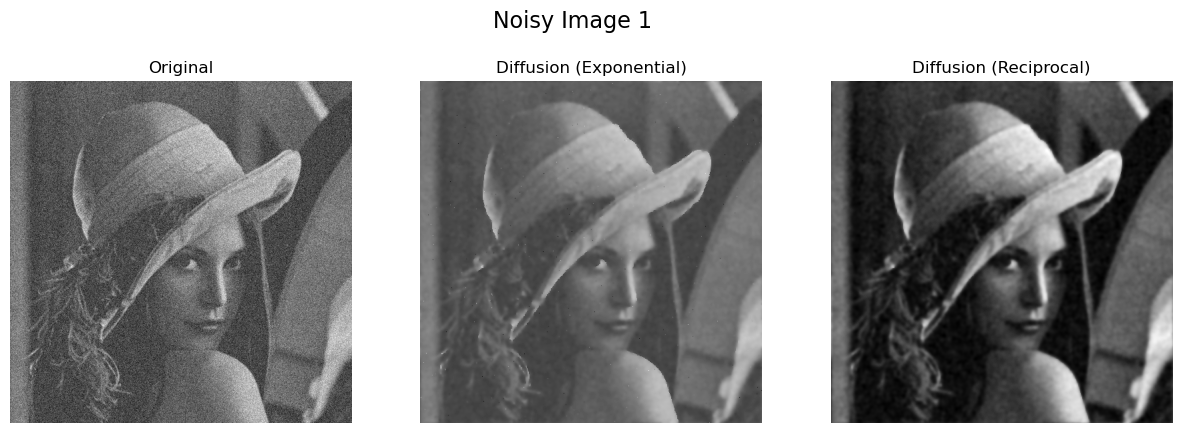

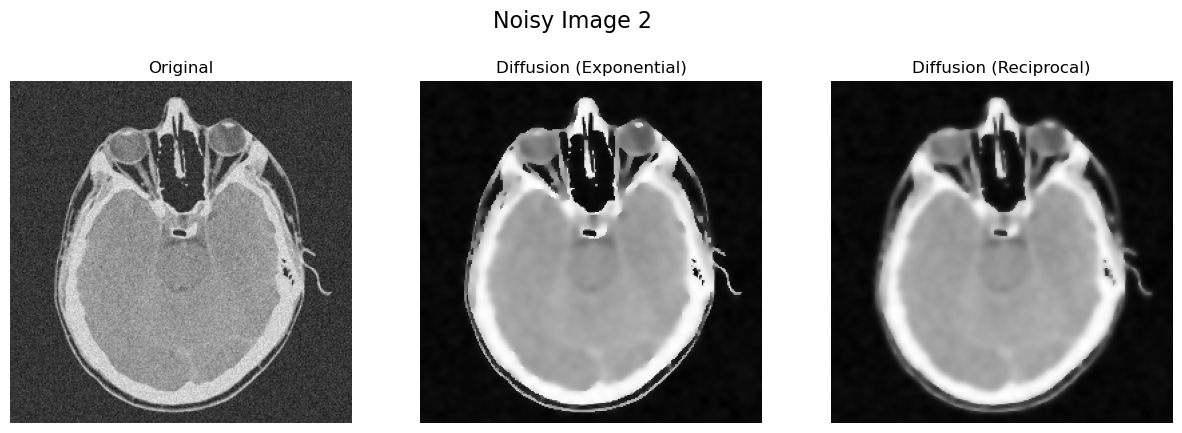

In [3]:
noisy1 = cv2.imread("noisy1.png", cv2.IMREAD_GRAYSCALE)
noisy2 = cv2.imread("noisy2.png", cv2.IMREAD_GRAYSCALE)

printADResults(noisy1, "Noisy Image 1")
printADResults(noisy2, "Noisy Image 2")

## Question 2

In [4]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size//2), size//2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

In [5]:
def gaussian_smoothing(img, size=5, sigma=1):
    kernel = gaussian_kernel(size, sigma)
    smoothed = cv2.filter2D(img, -1, kernel)
    return smoothed

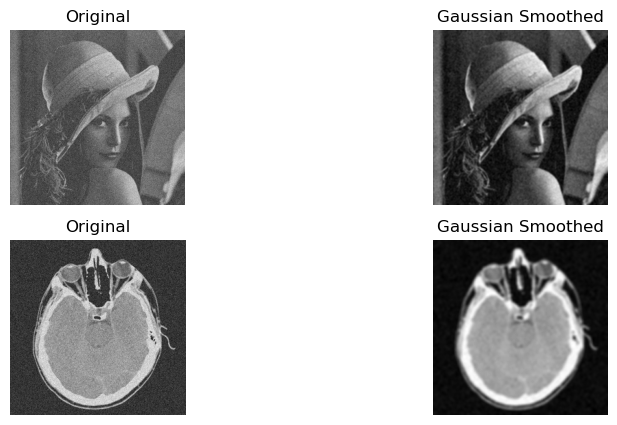

In [6]:

smoothed_noisy1 = gaussian_smoothing(noisy1, size=7, sigma=2)
smoothed_noisy2 = gaussian_smoothing(noisy2, size=7, sigma=2)

# Show original vs smoothed
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)


plt.imshow(noisy1, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(smoothed_noisy1, cmap='gray')
plt.title("Gaussian Smoothed")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(noisy2, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(smoothed_noisy2, cmap='gray')
plt.title("Gaussian Smoothed")
plt.axis("off")

plt.show()

It seems that Anisotropic diffusion is more adept at specifying pieces of an image, the Gaussian Smoothing is more of just a filter.  Anisotropic Diffusion also does reduce the blurring of edges as Gaussian filters do. While also printing an exampolen that reduces this slightly to help identify smaller edges in the image. 

## Question 3

The easiest issue to identify is how important parameters are for Anisottopic diffusion, accidentally blurring important edges or not blurring noise enough are 2 comprehensible issues. However, it will also create staircasing artifacts. Not a huge deal but in many iterations can start to make the images look artificial. 